<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.145607,21.710007,48.628358,0.076440,111.560412,111.514169,0.046243
1,0.0,1.0,82.493748,83.038709,97.385286,0.008487,272.926230,272.918458,0.007772
2,0.0,2.0,78.340575,66.273323,30.402214,-0.005119,185.010992,185.012478,-0.001486
3,0.0,3.0,31.878142,47.995273,46.362059,0.005454,136.240928,136.255453,-0.014525
4,0.0,4.0,90.612481,63.255670,55.725324,-0.007310,219.586166,219.591645,-0.005479
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,70.039931,81.402669,20.868203,0.000697,182.311501,182.311206,0.000294
19996,999.0,16.0,72.532113,36.780048,29.315179,0.007140,148.634480,148.624242,0.010238
19997,999.0,17.0,29.306998,98.928516,33.415544,-0.003019,171.648040,171.651203,-0.003163
19998,999.0,18.0,43.101232,59.309375,79.611507,-0.005972,192.016142,192.014126,0.002017


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.145607,21.710007,48.628358,0.076440,111.560412,111.514169,0.046243
1,0.0,1.0,82.493748,83.038709,97.385286,0.008487,272.926230,272.918458,0.007772
2,0.0,2.0,78.340575,66.273323,30.402214,-0.005119,185.010992,185.012478,-0.001486
3,0.0,3.0,31.878142,47.995273,46.362059,0.005454,136.240928,136.255453,-0.014525
4,0.0,4.0,90.612481,63.255670,55.725324,-0.007310,219.586166,219.591645,-0.005479
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,70.039931,81.402669,20.868203,0.000697,182.311501,182.311206,0.000294
19996,999.0,16.0,72.532113,36.780048,29.315179,0.007140,148.634480,148.624242,0.010238
19997,999.0,17.0,29.306998,98.928516,33.415544,-0.003019,171.648040,171.651203,-0.003163
19998,999.0,18.0,43.101232,59.309375,79.611507,-0.005972,192.016142,192.014126,0.002017


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    31.145607  21.710007  48.628358  0.076440  111.560412   
      1.0    82.493748  83.038709  97.385286  0.008487  272.926230   
      2.0    78.340575  66.273323  30.402214 -0.005119  185.010992   
      3.0    31.878142  47.995273  46.362059  0.005454  136.240928   
      4.0    90.612481  63.255670  55.725324 -0.007310  219.586166   
...                ...        ...        ...       ...         ...   
999.0 15.0   70.039931  81.402669  20.868203  0.000697  182.311501   
      16.0   72.532113  36.780048  29.315179  0.007140  148.634480   
      17.0   29.306998  98.928516  33.415544 -0.003019  171.648040   
      18.0   43.101232  59.309375  79.611507 -0.005972  192.016142   
      19.0   44.728299  24.306236  35.695462  0.028215  114.758212   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.514169  0.046243  
      1.0    272.918458  0.007772  
      2.0    185.012478 -0.001486  
      3.0    136.255453 -0.014525  
      4.0    219.591645 -0.005479  
...                 ...       ...  
999.0 15.0   182.311206  0.000294  
      16.0   148.624242  0.010238  
      17.0   171.651203 -0.003163  
      18.0   192.014126  0.002017  
      19.0   114.725685  0.032527  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    31.145607  21.710007  48.628358  0.076440  111.560412   
      1.0    82.493748  83.038709  97.385286  0.008487  272.926230   
      2.0    78.340575  66.273323  30.402214 -0.005119  185.010992   
      3.0    31.878142  47.995273  46.362059  0.005454  136.240928   
      4.0    90.612481  63.255670  55.725324 -0.007310  219.586166   
...                ...        ...        ...       ...         ...   
999.0 15.0   70.039931  81.402669  20.868203  0.000697  182.311501   
      16.0   72.532113  36.780048  29.315179  0.007140  148.634480   
      17.0   29.306998  98.928516  33.415544 -0.003019  171.648040   
      18.0   43.101232  59.309375  79.611507 -0.005972  192.016142   
      19.0   44.728299  24.306236  35.695462  0.028215  114.758212   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.514169  0.046243  
      1.0    272.918458  0.007772  
      2.0    185.012478 -0.001486  
      3.0    136.255453 -0.014525  
      4.0    219.591645 -0.005479  
...                 ...       ...  
999.0 15.0   182.311206  0.000294  
      16.0   148.624242  0.010238  
      17.0   171.651203 -0.003163  
      18.0   192.014126  0.002017  
      19.0   114.725685  0.032527  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.145607,21.710007,48.628358,0.076440,111.560412,111.514169,0.046243
1,0.0,1.0,82.493748,83.038709,97.385286,0.008487,272.926230,272.918458,0.007772
2,0.0,2.0,78.340575,66.273323,30.402214,-0.005119,185.010992,185.012478,-0.001486
3,0.0,3.0,31.878142,47.995273,46.362059,0.005454,136.240928,136.255453,-0.014525
4,0.0,4.0,90.612481,63.255670,55.725324,-0.007310,219.586166,219.591645,-0.005479
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,70.039931,81.402669,20.868203,0.000697,182.311501,182.311206,0.000294
19996,999.0,16.0,72.532113,36.780048,29.315179,0.007140,148.634480,148.624242,0.010238
19997,999.0,17.0,29.306998,98.928516,33.415544,-0.003019,171.648040,171.651203,-0.003163
19998,999.0,18.0,43.101232,59.309375,79.611507,-0.005972,192.016142,192.014126,0.002017


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    31.145607  21.710007  48.628358  0.076440  111.560412   
      1.0    82.493748  83.038709  97.385286  0.008487  272.926230   
      2.0    78.340575  66.273323  30.402214 -0.005119  185.010992   
      3.0    31.878142  47.995273  46.362059  0.005454  136.240928   
      4.0    90.612481  63.255670  55.725324 -0.007310  219.586166   
...                ...        ...        ...       ...         ...   
999.0 15.0   70.039931  81.402669  20.868203  0.000697  182.311501   
      16.0   72.532113  36.780048  29.315179  0.007140  148.634480   
      17.0   29.306998  98.928516  33.415544 -0.003019  171.648040   
      18.0   43.101232  59.309375  79.611507 -0.005972  192.016142   
      19.0   44.728299  24.306236  35.695462  0.028215  114.758212   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.514169  0.046243  
      1.0    272.918458  0.007772  
      2.0    185.012478 -0.001486  
      3.0    136.255453 -0.014525  
      4.0    219.591645 -0.005479  
...                 ...       ...  
999.0 15.0   182.311206  0.000294  
      16.0   148.624242  0.010238  
      17.0   171.651203 -0.003163  
      18.0   192.014126  0.002017  
      19.0   114.725685  0.032527  

[20000 rows x 7 columns]

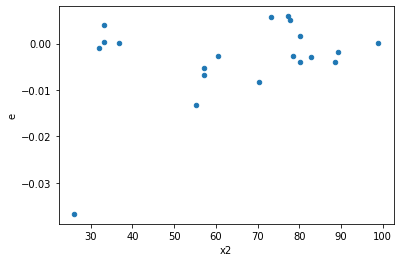

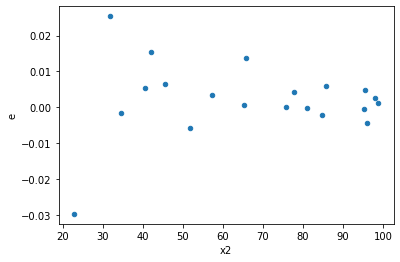

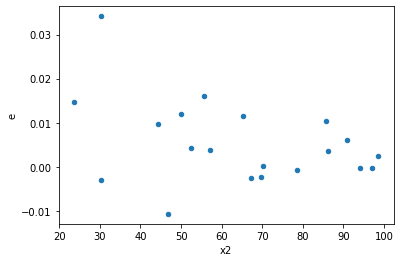

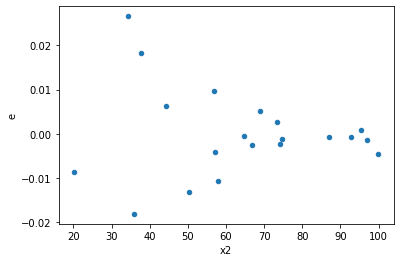

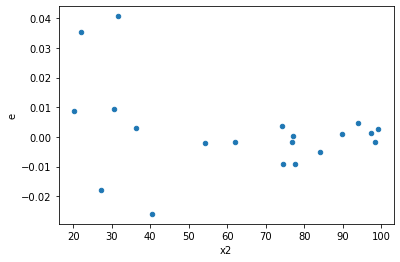

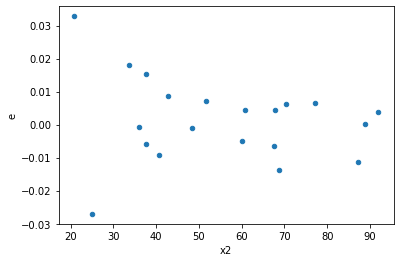

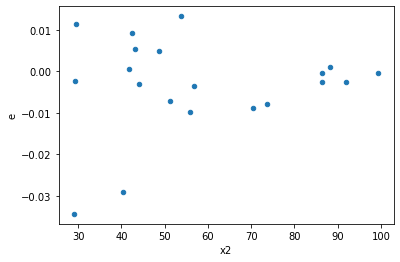

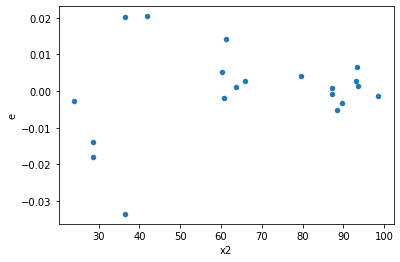

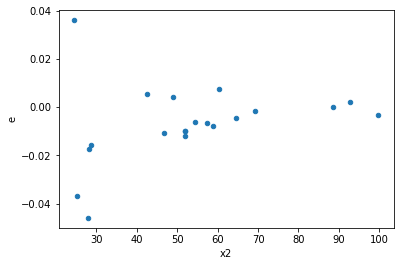

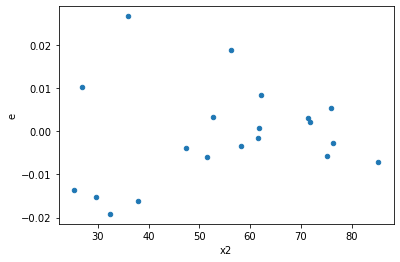

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,5.0,5.0,9.611576076217229e-05,0.0002556331389407953,1.922315215243446e-05,5.112662778815906e-05,2.6596380959136443,0.30677923155649944,0.8466103842217503,0.15338961577824972,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.00020669930260884696,0.0002465817349229835,4.133986052176939e-05,4.9316346984596695e-05,1.1929490414856847,0.8512076567853637,0.5743961716073182,0.42560382839268185,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,0.00011172142661981234,0.00015555249386840572,2.2344285323962466e-05,3.111049877368114e-05,1.3923246289876907,0.7253252390712115,0.6373373804643943,0.36266261953560575,Reject005=1 : Homoscedasticity
15.0,5.0,5.0,0.0002485713288454339,0.0011985793074604193,4.9714265769086784e-05,0.00023971586149208385,4.8218727116582185,0.10924041435482224,0.9453797928225889,0.05462020717741112,Reject005=1 : Homoscedasticity
26.0,5.0,5.0,0.0001732281058047277,0.000247740568729419,3.464562116094554e-05,4.95481137458838e-05,1.4301407244427522,0.7041963309169419,0.647901834541529,0.35209816545847095,Reject005=1 : Homoscedasticity
31.0,5.0,5.0,0.00022465896347445801,0.0004629255695423304,4.49317926948916e-05,9.258511390846608e-05,2.0605702188907387,0.44639262443646754,0.7768036877817662,0.22319631221823377,Reject005=1 : Homoscedasticity
34.0,5.0,5.0,7.64269267471785e-05,0.00022181810023072602,1.52853853494357e-05,4.43636200461452e-05,2.9023553565682922,0.2671369573784257,0.8664315213107872,0.13356847868921284,Reject005=1 : Homoscedasticity
35.0,5.0,5.0,0.00029607562535231624,0.001941177328736455,5.9215125070463244e-05,0.000388235465747291,6.556356425580607,0.05966471873969348,0.9701676406301533,0.02983235936984674,Reject005=1 : Homoscedasticity
42.0,5.0,5.0,0.0004405105356494152,0.0004804750170240239,8.810210712988304e-05,9.609500340480478e-05,1.0907230999950812,0.9264028052385607,0.5367985973807197,0.46320140261928033,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.0005811483020507239,7.203701779826816e-05,0.00011622966041014478,1.4407403559653634e-05,0.12395634220055007,0.0388133237944734,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,0.001172916888743277,8.297116646423536e-05,0.00023458337774865542,1.659423329284707e-05,0.07073916938235486,0.011337427662438787,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,0.0012753003287396196,7.932995541891442e-05,0.0002550600657479239,1.5865991083782884e-05,0.062204920387118764,0.008457875127287887,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,0.0013213751845040675,0.00014256684424699697,0.0002642750369008135,2.8513368849399394e-05,0.10789278164059402,0.028865423497535073,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.00035108261176802373,8.692816128322127e-05,7.021652235360474e-05,1.7385632256644253e-05,0.2476003036591817,0.15171386142880627,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,9.611576076217229e-05,0.0002556331389407953,1.922315215243446e-05,5.112662778815906e-05,2.6596380959136443,0.30677923155649944,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.0002023033091189721,0.00017961202650639365,4.046066182379442e-05,3.592240530127873e-05,0.887835336399594,0.8993128644014416,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.00020669930260884696,0.0002465817349229835,4.133986052176939e-05,4.9316346984596695e-05,1.1929490414856847,0.8512076567853637,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.00040767165483123976,0.00013481306536040032,8.153433096624795e-05,2.6962613072080065e-05,0.33069030864117277,0.2498946377227457,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      691
Reject005=0 : Heteroscedasticity    309
Name: Result_test, dtype: int64